# EDA of heartdiseases

In [1]:
# import library
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
heart_df = pd.read_csv("https://raw.githubusercontent.com/shaunzhao666/midterm_object/code/heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
heart_df["ca"].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [14]:
heart_df["oldpeak"].min()

0.0

In [8]:
hd = heart_df.copy()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


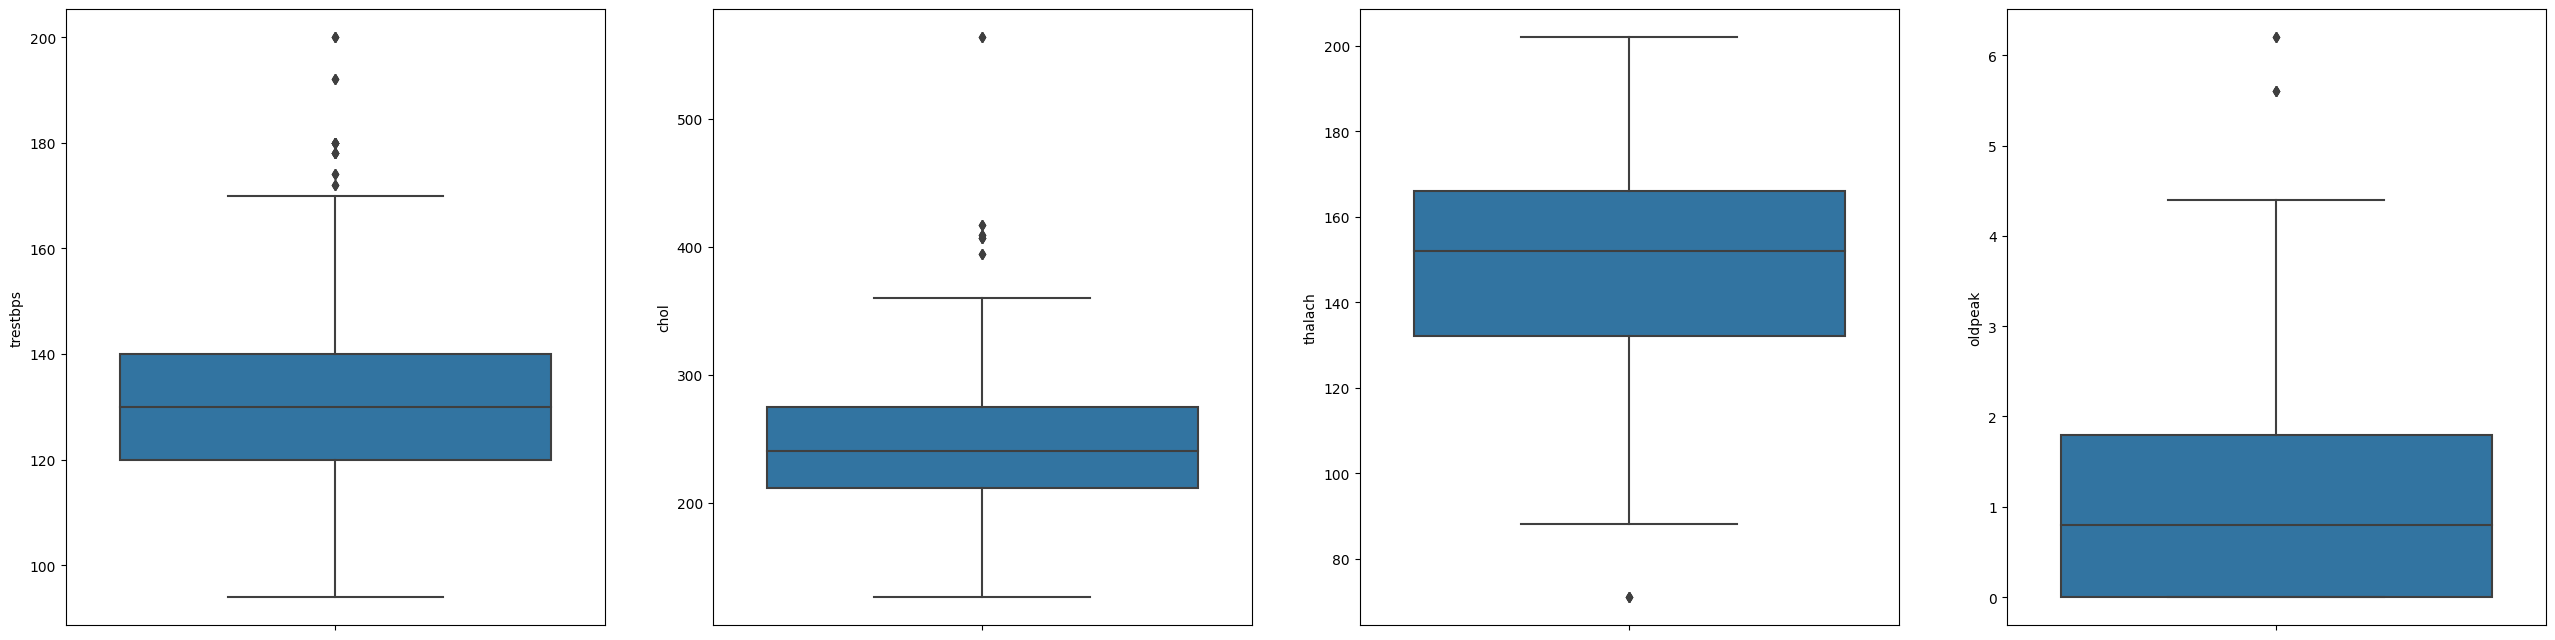

In [7]:
fig, (ax1, ax2, ax3, ax4)=plt.subplots(1, 4, figsize=(32, 8))
ax1 = sns.boxplot(y=heart_df["trestbps"], ax=ax1)
ax2 = sns.boxplot(y=heart_df["chol"], ax=ax2)
ax3 = sns.boxplot(y=heart_df["thalach"], ax= ax3)
ax4 = sns.boxplot(y=heart_df["oldpeak"], ax=ax4)

<AxesSubplot:ylabel='chol'>

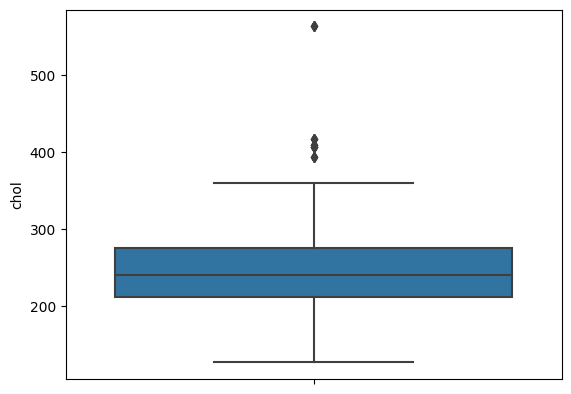

In [5]:
sns.boxplot(y=heart_df["chol"])

<AxesSubplot:ylabel='thalach'>

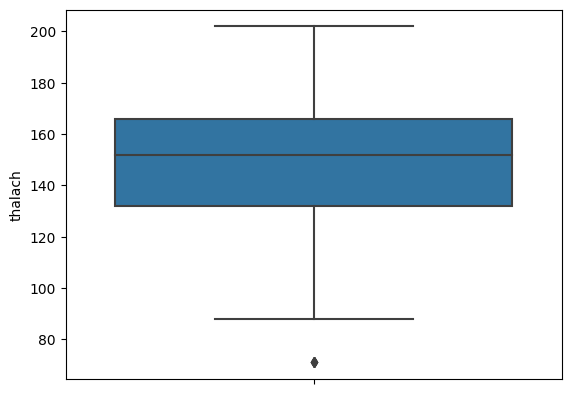

In [6]:
sns.boxplot(y=heart_df["thalach"])

<AxesSubplot:ylabel='oldpeak'>

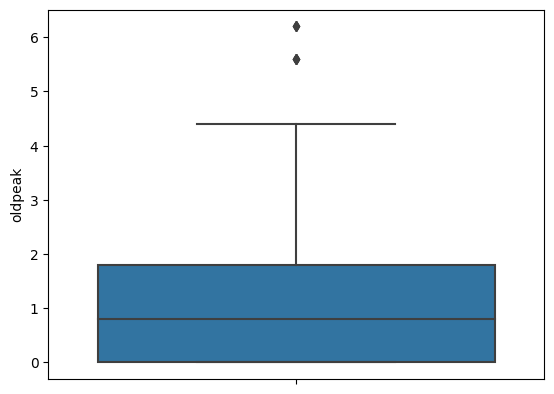

In [7]:
sns.boxplot(y=heart_df["oldpeak"])

### delete the outlier


In [4]:
conti = ["trestbps", "chol", "thalach", "oldpeak"]
for i in conti:
    q1 = np.quantile(heart_df[i], .25)
    q3 = np.quantile(heart_df[i], .75)
    iqr = q3 - q1
    max = q3 + 1.5 * iqr
    min = q1 - 1.5 * iqr
    heart_df = heart_df.where(heart_df[i] <= max).where( heart_df[i] >= min).dropna()


<AxesSubplot:ylabel='trestbps'>

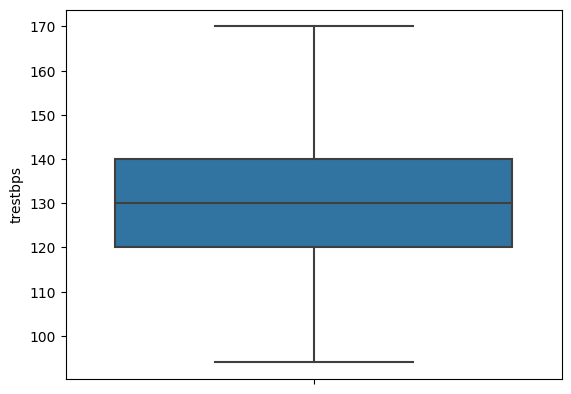

In [11]:
sns.boxplot(y=heart_df["trestbps"])

<AxesSubplot:ylabel='chol'>

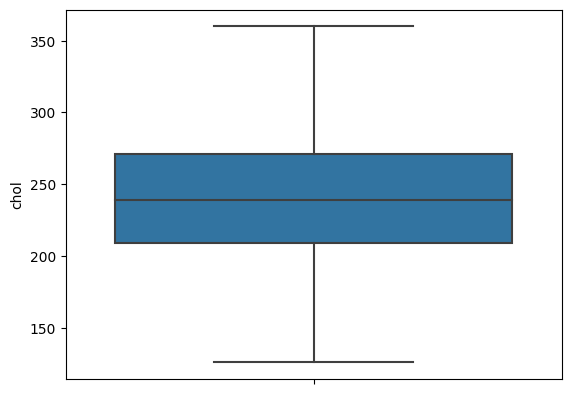

In [12]:
sns.boxplot(y=heart_df["chol"])

<AxesSubplot:ylabel='thalach'>

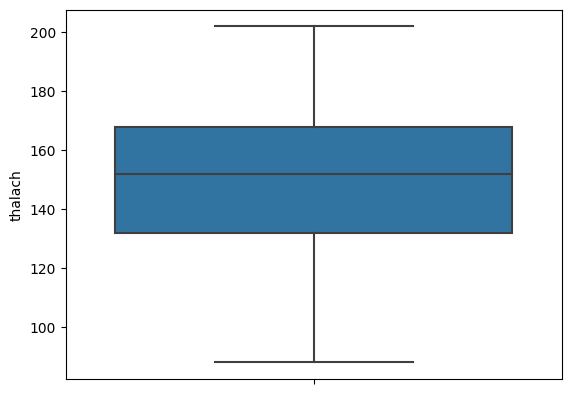

In [18]:
sns.boxplot(y=heart_df["thalach"])

<AxesSubplot:ylabel='oldpeak'>

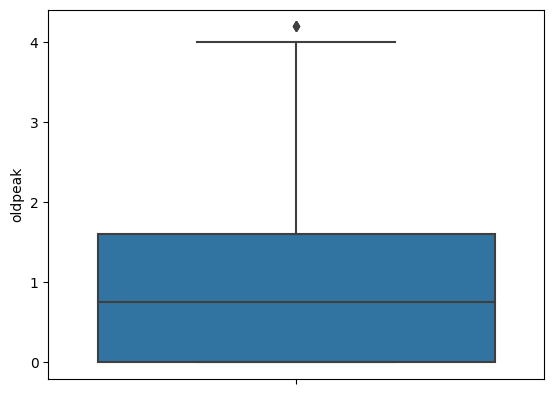

In [17]:
sns.boxplot(y=heart_df["oldpeak"])

<AxesSubplot:>

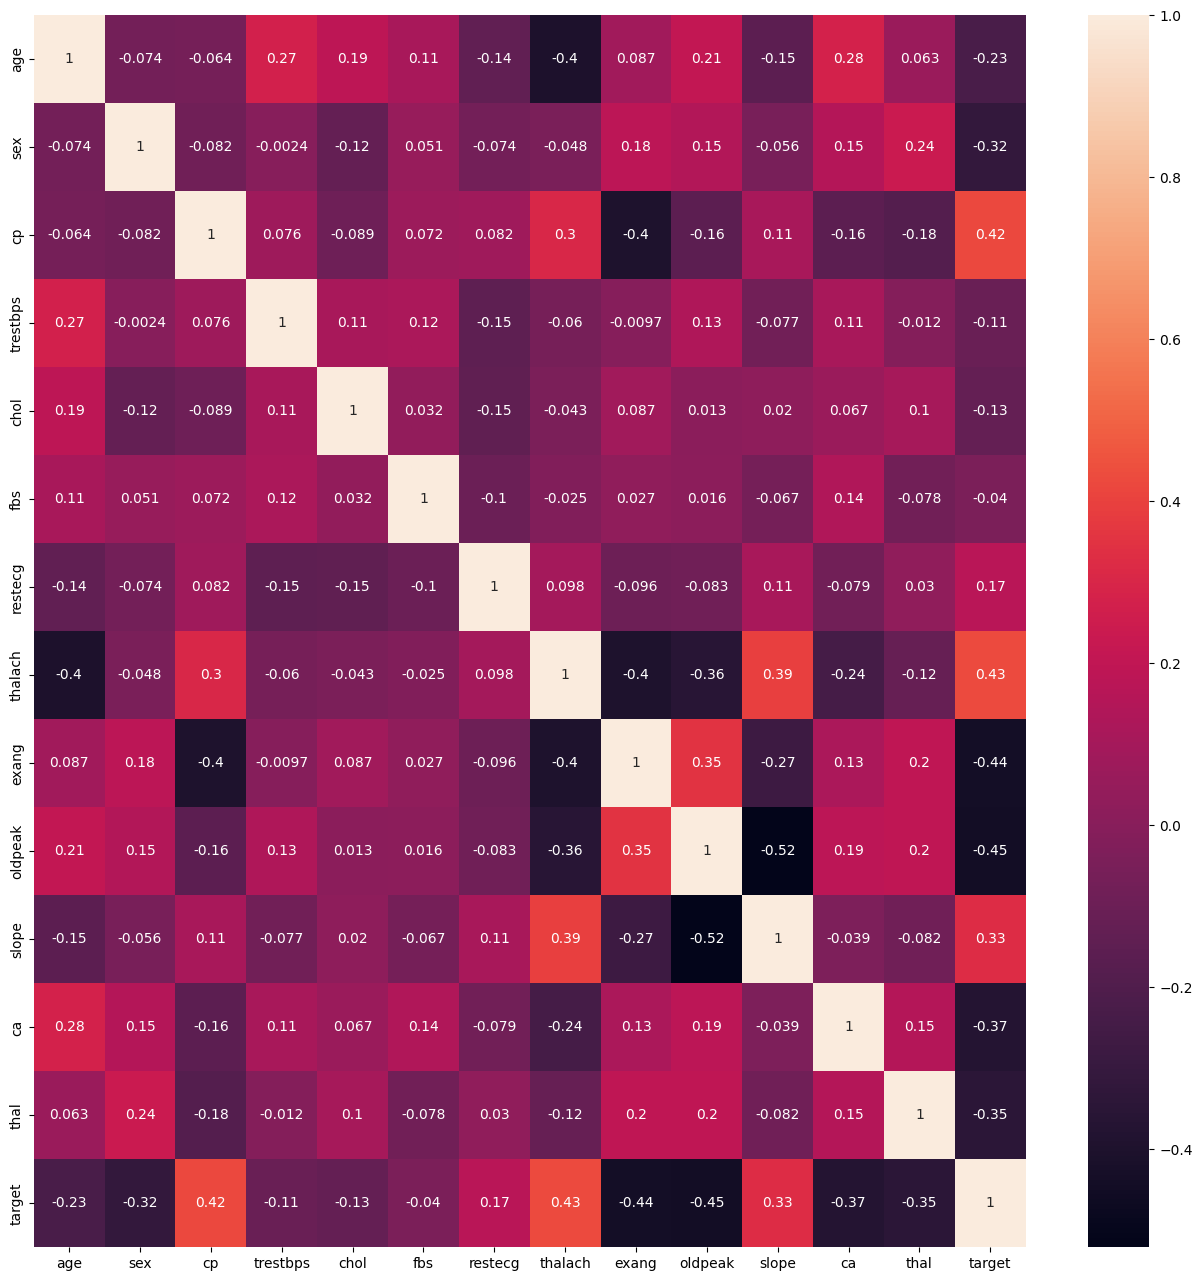

In [21]:
plt.figure(figsize=(16, 16))
sns.heatmap(heart_df.corr(), annot=True)

<AxesSubplot:xlabel='thalach', ylabel='oldpeak'>

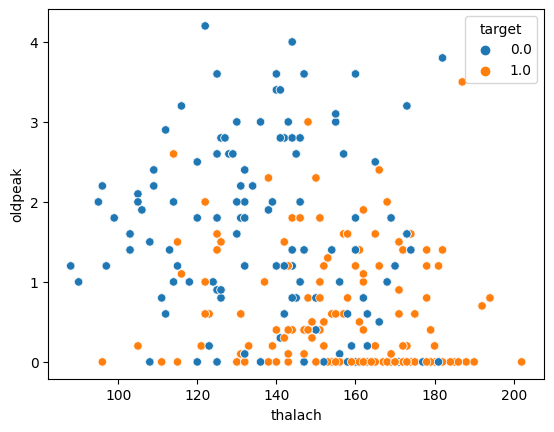

In [22]:
# "trestbps", "chol", "thalach", "oldpeak"
sns.scatterplot(data=heart_df, x="thalach", y="oldpeak", hue="target")

In [3]:
fig = px.scatter_3d(heart_df, x='thalach', y='oldpeak', z='cp', color='target', title="image")
fig.show()

In [6]:
fig2 = px.scatter_3d(heart_df, x='thalach', y='oldpeak', z='exang', color='target')
fig2.show()

In [4]:
fig2 = px.scatter_3d(heart_df, x='thalach', y='oldpeak', z='sex', color='target')
fig2.show()